# Importing Data and Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc("font", size=10)
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_palette("Set2")
sns.set_style("white")
sns.set_style("ticks")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path1 = r"/content/drive/MyDrive/Colab Notebooks/AMEX/amex_train1.parquet"
path2 = r"/content/drive/MyDrive/Colab Notebooks/AMEX/amex_test1.parquet"

train_data = pd.read_parquet(path1)
test_data= pd.read_parquet(path2)

In [6]:
train_data.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,...,10.0,0.63899,NaN,0.0,1,10,770,4.0,3080.0,0
1,230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,...,13.0,0.63836,NaN,NaN,0,732,437,5.0,2185.0,1
2,230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,...,1.0,1.00000,NaN,0.0,1,89,795,4.0,3180.0,1
3,230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,...,3.0,0.53241,0.0,0.0,0,3,755,4.0,3020.0,0
4,230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,...,1.0,0.92665,NaN,NaN,0,5,425,4.0,1700.0,0


In [7]:
df= train_data.set_index('application_key')
# dft= test_data.set_index('application_key')

In [8]:
df.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
application_key,,,,,,,,,,,,,,,,,,,,,
230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,10.0,0.63899,NaN,0.0,1,10,770,4.0,3080.0,0
230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,13.0,0.63836,NaN,NaN,0,732,437,5.0,2185.0,1
230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,...,1.0,1.00000,NaN,0.0,1,89,795,4.0,3180.0,1
230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,3.0,0.53241,0.0,0.0,0,3,755,4.0,3020.0,0
230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,1.0,0.92665,NaN,NaN,0,5,425,4.0,1700.0,0


In [9]:
def value_counts_func(column_name):
    print(df[column_name].value_counts().sort_values(ascending = False),"\n")
    # print(dft[column_name].value_counts().sort_values(ascending = False),"\n")

In [10]:
cols=df.columns
cols

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47', 'mvar48', 'mvar49', 'mvar50',
       'mvar51', 'default_ind'],
      dtype='object')

In [11]:
# for col in cols:
#     value_counts_func(col)

In [12]:
def convert_non_numerical_to_nan(df):
    return df.apply(pd.to_numeric, errors='coerce')

In [13]:
df=convert_non_numerical_to_nan(df)
# dft=convert_non_numerical_to_nan(dft)

In [14]:

# Remove columns with high Nan values

def remove_columns_with_nan(df, threshold):
    # Calculate the percentage of NaN values in each column
    nan_percentages = df.isnull().mean()

    # Get column names where NaN percentage is less than or equal to the threshold
    selected_columns = nan_percentages[nan_percentages <= threshold].index

    # Create a new DataFrame with selected columns
    new_df = df[selected_columns]

    return new_df

# Remove Datapoints with maximum missing values

def remove_rows_with_nans(df, k):
    # Calculate the number of NaN values in each row
    nan_counts = df.isnull().sum(axis=1)

    # Get indices of rows where the number of NaN values is less than or equal to K
    selected_indices = nan_counts[nan_counts <= k].index

    # Create a new DataFrame with selected rows
    new_df = df.loc[selected_indices]

    return new_df




In [15]:
df = remove_columns_with_nan(df, threshold=0.4)
df

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar42,mvar43,mvar44,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
application_key,,,,,,,,,,,,,,,,,,,,,
230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,0.08696,10.0,0.63899,0.0,1,10,770,4.0,3080.0,0
230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.00000,13.0,0.63836,NaN,0,732,437,5.0,2185.0,1
230034,1745.0,0.4001,0.000,0.0,0.0,NaN,2536.0,NaN,NaN,2536.0,...,0.00000,1.0,1.00000,0.0,1,89,795,4.0,3180.0,1
230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.15385,3.0,0.53241,0.0,0,3,755,4.0,3020.0,0
230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.00000,1.0,0.92665,NaN,0,5,425,4.0,1700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578064,1748.0,0.3044,0.000,0.0,0.0,0.0,20114.0,5574.0,77386.0,81647.0,...,0.04348,13.0,0.48002,0.0,0,13,678,4.0,2712.0,0
578065,1846.0,NaN,0.000,0.0,0.0,793.0,18608.0,18608.0,63820.0,29187.0,...,0.00000,5.0,0.46925,0.0,0,24,759,5.0,3795.0,0
578066,1907.0,0.0381,0.000,0.0,0.0,2478.0,24775.0,24775.0,100294.0,88249.0,...,0.00000,19.0,0.67960,0.0,0,3,724,5.0,3620.0,0


In [16]:
# Set the value of 'k' to the maximum number of allowed NaN values in a row
k = 10  # Change this to your desired value
df = remove_rows_with_nans(df, k)
df

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar42,mvar43,mvar44,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
application_key,,,,,,,,,,,,,,,,,,,,,
230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,0.08696,10.0,0.63899,0.0,1,10,770,4.0,3080.0,0
230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.00000,13.0,0.63836,NaN,0,732,437,5.0,2185.0,1
230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.15385,3.0,0.53241,0.0,0,3,755,4.0,3020.0,0
230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.00000,1.0,0.92665,NaN,0,5,425,4.0,1700.0,0
230038,1818.0,0.4001,0.000,0.0,0.0,NaN,1088.0,NaN,1536.0,1498.0,...,0.00000,2.0,0.87224,0.0,1,2,392,5.0,1960.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578064,1748.0,0.3044,0.000,0.0,0.0,0.0,20114.0,5574.0,77386.0,81647.0,...,0.04348,13.0,0.48002,0.0,0,13,678,4.0,2712.0,0
578065,1846.0,NaN,0.000,0.0,0.0,793.0,18608.0,18608.0,63820.0,29187.0,...,0.00000,5.0,0.46925,0.0,0,24,759,5.0,3795.0,0
578066,1907.0,0.0381,0.000,0.0,0.0,2478.0,24775.0,24775.0,100294.0,88249.0,...,0.00000,19.0,0.67960,0.0,0,3,724,5.0,3620.0,0


In [17]:
df.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar42,mvar43,mvar44,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
application_key,,,,,,,,,,,,,,,,,,,,,
230032,1696.0,1.6541,0.000,0.0,0.0,0.0,6015.0,322.0,40369.0,18414.0,...,0.08696,10.0,0.63899,0.0,1,10,770,4.0,3080.0,0
230033,1846.0,0.8095,0.000,0.0,0.0,102.0,7532.0,3171.0,18234.0,13664.0,...,0.00000,13.0,0.63836,NaN,0,732,437,5.0,2185.0,1
230035,1739.0,0.2193,0.000,0.0,0.0,1982.0,26440.0,4955.0,20316.0,37013.0,...,0.15385,3.0,0.53241,0.0,0,3,755,4.0,3020.0,0
230036,1787.0,0.0118,0.225,0.0,0.0,5451.0,5494.0,5494.0,7987.0,4696.0,...,0.00000,1.0,0.92665,NaN,0,5,425,4.0,1700.0,0
230038,1818.0,0.4001,0.000,0.0,0.0,NaN,1088.0,NaN,1536.0,1498.0,...,0.00000,2.0,0.87224,0.0,1,2,392,5.0,1960.0,1


In [18]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df, columns_to_skip=None):
    scaler = StandardScaler()
    scaled_data = df.copy()

    if columns_to_skip is None:
        columns_to_scale = df.columns
    else:
        columns_to_scale = df.columns.difference(columns_to_skip)

    scaled_data[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    return scaled_data

In [19]:
df=perform_scaling(df,['default_ind'])
# dft=perform_scaling(dft)

In [20]:
df.fillna(df.median(), inplace=True)

In [21]:
df

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar42,mvar43,mvar44,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
application_key,,,,,,,,,,,,,,,,,,,,,
230032,-0.752748,0.386584,-0.452206,-0.252061,-0.162014,-0.445368,-0.259216,-0.646414,0.095039,-0.236119,...,-0.534286,0.400995,-0.252109,-0.24519,0.806044,-0.493402,1.177586,-0.687602,0.708773,0
230033,0.943149,-0.152311,-0.452206,-0.252061,-0.162014,-0.417538,-0.227784,-0.363319,-0.338852,-0.303528,...,-0.837177,0.882168,-0.254715,-0.24519,-1.240627,0.159559,-1.129378,1.454329,-0.592613,1
230035,-0.266591,-0.528886,-0.452206,-0.252061,-0.162014,0.095408,0.163981,-0.186049,-0.298041,0.027823,...,-0.301300,-0.721742,-0.692971,-0.24519,-1.240627,-0.499733,1.073668,-0.687602,0.621529,0
230036,0.276096,-0.661281,-0.429431,-0.252061,-0.162014,1.041901,-0.270011,-0.132490,-0.539714,-0.430794,...,-0.837177,-1.042524,0.937780,-0.24519,-1.240627,-0.497924,-1.212511,-0.687602,-1.297834,0
230038,0.626582,-0.413527,-0.452206,-0.252061,-0.162014,-0.364333,-0.361301,-0.428602,-0.666167,-0.476178,...,-0.837177,-0.882133,0.712716,-0.24519,0.806044,-0.500637,-1.441129,1.454329,-0.919777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578064,-0.164837,-0.474588,-0.452206,-0.252061,-0.162014,-0.445368,0.032909,-0.124541,0.820648,0.661233,...,-0.685731,0.882168,-0.909679,-0.24519,-1.240627,-0.490689,0.540226,-0.687602,0.173678,0
578065,0.943149,-0.348319,-0.452206,-0.252061,-0.162014,-0.229003,0.001705,1.170603,0.554727,-0.083237,...,-0.837177,-0.400960,-0.954229,-0.24519,-1.240627,-0.480741,1.101380,1.454329,1.748427,0
578066,1.632814,-0.644500,-0.452206,-0.252061,-0.162014,0.230738,0.129483,1.783396,1.269692,0.754924,...,-0.837177,1.844514,-0.084128,-0.24519,-1.240627,-0.499733,0.858906,1.454329,1.493966,0


In [22]:
# df=df.abs()
# dft=dft.abs()

# Treatment

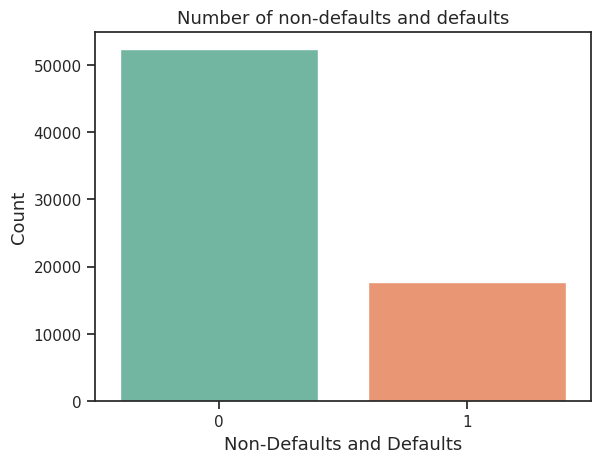

In [23]:
sns.countplot(x ='default_ind', data = df)
# plt.xticks(rotation=0, fontsize=13)
plt.title('Number of non-defaults and defaults',fontsize=13)
plt.xlabel('Non-Defaults and Defaults',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.show()

# Model

## Input and Output Matrix

In [24]:
X = df.drop(['default_ind'],axis=1)
y = df['default_ind']
# X_given = dft

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, f1_score

## Train Test Split

In [26]:
# getting data ready to build model
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=42,
                                                    shuffle=True)


In [31]:
X_train,y_train = X_train[:20000],y_train[:20000]

>knn 0.715 (0.020)
>cart 0.686 (0.016)
>svm 0.732 (0.023)
>gbm 0.750 (0.019)
>rf 0.739 (0.020)
>stacking 0.749 (0.023)


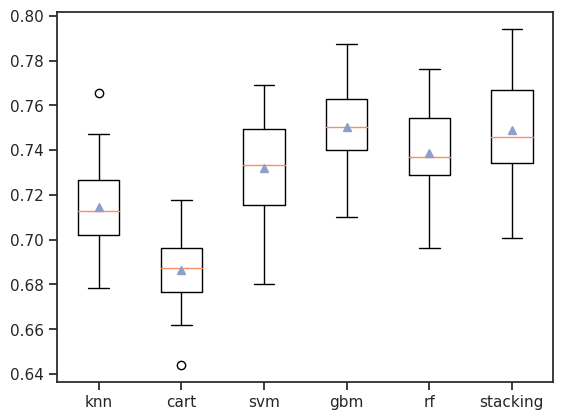

In [33]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('gbm',GradientBoostingClassifier()))
    level0.append(('rf',RandomForestClassifier()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['gbm']=GradientBoostingClassifier()
    models['rf']=RandomForestClassifier()
    # models
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = X_train,y_train

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

>knn -101.019 (7.161)
>cart -148.400 (10.234)
>svm -162.419 (12.565)
>stacking -56.813 (5.254)


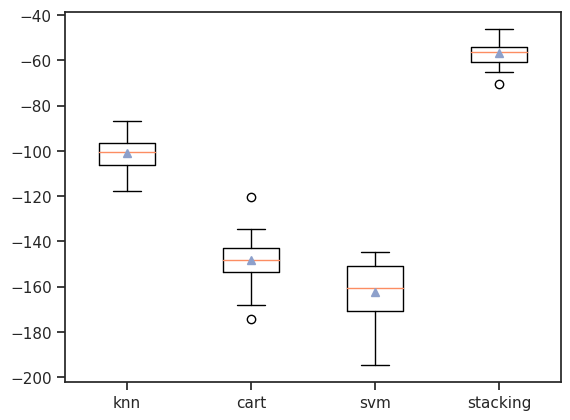

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
yhat = model.predict(data)
print('Predicted Value: %.3f' % (yhat))

Predicted Value: 558.175


# Modeling

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb


class ClassifierTrainer:
    def __init__(self, X, y,X_test):
        self.X = X
        self.y = y
        self.X_test = X_test

        self.rf_classifier = None
        self.gb_classifier = None
        self.lgbm_classifier = None
        self.xgb_classifier = None
        self.svm_classifier = None

    def train_random_forest(self, n_estimators=100, max_depth=None):
        self.rf_classifier = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth
        )
        self.rf_classifier.fit(self.X, self.y)

    def train_gradient_boosting(self, n_estimators=100, max_depth=3, learning_rate=0.1):
        self.gb_classifier = GradientBoostingClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate
        )
        self.gb_classifier.fit(self.X, self.y)

    def train_lgbm(self, n_estimators=100, max_depth=-1, learning_rate=0.1):
        self.lgbm_classifier = lgb.LGBMClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate
        )
        self.lgbm_classifier.fit(self.X, self.y)

    def train_xgboost(self, n_estimators=100, max_depth=3, learning_rate=0.1):
        self.xgb_classifier = xgb.XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate
        )
        self.xgb_classifier.fit(self.X, self.y)

    def train_svm(self, kernel='rbf', C=1.0, gamma='scale'):
        self.svm_classifier = svm.SVC(
            kernel=kernel,
            C=C,
            gamma=gamma
        )
        self.svm_classifier.fit(self.X, self.y)

    def get_f1_scores(self, cv=5):
        f1_scores = {}
        if self.rf_classifier:
            scores = cross_val_score(
                self.rf_classifier,
                self.X,
                self.y,
                cv=cv,
                scoring='f1_macro'
            )
            f1_scores['Random Forest'] = np.mean(scores)

        if self.gb_classifier:
            scores = cross_val_score(
                self.gb_classifier,
                self.X,
                self.y,
                cv=cv,
                scoring='f1_macro'
            )
            f1_scores['Gradient Boosting'] = np.mean(scores)

        if self.lgbm_classifier:
            scores = cross_val_score(
                self.lgbm_classifier,
                self.X,
                self.y,
                cv=cv,
                scoring='f1_macro'
            )
            f1_scores['LightGBM'] = np.mean(scores)

        if self.xgb_classifier:
            scores = cross_val_score(
                self.xgb_classifier,
                self.X,
                self.y,
                cv=cv,
                scoring='f1_macro'
            )
            f1_scores['XGBoost'] = np.mean(scores)

        if self.svm_classifier:
            scores = cross_val_score(
                self.svm_classifier,
                self.X,
                self.y,
                cv=cv,
                scoring='f1_macro'
            )
            f1_scores['SVM'] = np.mean(scores)

        return f1_scores

    def get_feature_importances(self):
        feature_importances = {}
        if self.rf_classifier:
            importances = self.rf_classifier.feature_importances_
            feature_importances['Random Forest'] = importances

        if self.gb_classifier:
            importances = self.gb_classifier.feature_importances_
            feature_importances['Gradient Boosting'] = importances

        if self.lgbm_classifier:
            importances = self.lgbm_classifier.feature_importances_
            feature_importances['LightGBM'] = importances

        if self.xgb_classifier:
            importances = self.xgb_classifier.feature_importances_
            feature_importances['XGBoost'] = importances

        return feature_importances

    def get_predictions(self):
        predictions = {}
        if self.rf_classifier:
            preds = self.rf_classifier.predict(self.X)
            predictions['Random Forest'] = preds

        if self.gb_classifier:
            preds = self.gb_classifier.predict(self.X)
            predictions['Gradient Boosting'] = preds

        if self.lgbm_classifier:
            preds = self.lgbm_classifier.predict(self.X)
            predictions['LightGBM'] = preds

        if self.xgb_classifier:
            preds = self.xgb_classifier.predict(self.X)
            predictions['XGBoost'] = preds

        if self.svm_classifier:
            preds = self.svm_classifier.predict(self.X)
            predictions['SVM'] = preds

        return predictions

In [ ]:
# Usage example:
# Assume X and y are your feature matrix and target variable respectively

trainer = ClassifierTrainer(X_train, y_train, X_test)

# trainer.train_random_forest()
# trainer.train_gradient_boosting()
trainer.train_lgbm()
trainer.train_xgboost()
# trainer.train_svm()

In [ ]:
f1_scores = trainer.get_f1_scores()
print("F1 scores:")
for model, score in f1_scores.items():
    print(f"{model}: {score}")

feature_importances = trainer.get_feature_importances()
print("Feature importances:")
print(feature_importances)
# for model, importances in feature_importances.items():
#     print(f"{model}: {importances}")

predictions = trainer.get_predictions()
print("Predictions:")
for model, preds in predictions.items():
    print(f"{model}: {preds}")

F1 scores:
LightGBM: 0.6852266609973878
XGBoost: 0.6800194343925562
Feature importances:
{'LightGBM': array([161, 190,  46,  45,  34,  57,  84,  61,  86,  38,  67,  63,  73,
        54, 100,  10,  21,  28,  29,  19,  84,  45,  56,  67,  88,  55,
        58,  26,  73,  70,  51,  58,  77,  49,  19,  73,  32,  30,  10,
        66,  60,  83,  71,  80,  20,  14,  82, 140,  51,   1,  45],
      dtype=int32), 'XGBoost': array([0.09252658, 0.02586411, 0.01305974, 0.00735536, 0.00548857,
       0.20400901, 0.00926091, 0.0179084 , 0.00676132, 0.01064897,
       0.00523831, 0.00257038, 0.00357614, 0.00226661, 0.00472431,
       0.01591265, 0.01703975, 0.01858309, 0.0159669 , 0.00750046,
       0.00696212, 0.01055174, 0.00493881, 0.03293556, 0.03181896,
       0.00561788, 0.01260476, 0.10668166, 0.00570062, 0.00341493,
       0.00188558, 0.03146547, 0.00258552, 0.01181084, 0.02096329,
       0.01216102, 0.04524358, 0.02931186, 0.00643409, 0.01566278,
       0.00425034, 0.0126046 , 0.00512051, 0.00

In [ ]:
feature_df = pd.DataFrame.from_dict(feature_importances, orient='index')

# Transpose the DataFrame
feature_df = feature_df.transpose()
feature_df['features'] = [f'mvar{i+1}' for i in range(len(feature_df))]
feature_df.set_index('features', inplace=True)

In [ ]:
pred_df[['LightGBM']]

,LightGBM
0,0
1,0
2,0
3,0
4,0
...,...
62245,0
62246,0
62247,0
62248,0


In [ ]:
pred_df = pd.DataFrame.from_dict(predictions, orient='index')

# Transpose the DataFrame
pred_df = pred_df.transpose()
pred_df

,LightGBM,XGBoost
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
62245,0,0
62246,0,0
62247,0,0
62248,0,0


import numpy as np
from google.colab import autoviz
df_4181285138898537859 = autoviz.get_registered_df('df_4181285138898537859')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4181285138898537859, *['LightGBM'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4181285138898537859 = autoviz.get_registered_df('df_4181285138898537859')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4181285138898537859, *['XGBoost'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4181285138898537859 = autoviz.get_registered_df('df_4181285138898537859')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4181285138898537859, *['LightGBM'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4181285138898537859 = autoviz.get_registered_df('df_4181285138898537859')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4181285138898537859, *['XGBoost'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4181285138898537859 = autoviz.get_registered_df('df_4181285138898537859')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4181285138898537859, *[[['LightGBM', 'XGBoost']]], **{})
chart

In [ ]:
# Assuming you have created an instance of ClassifierTrainer and trained the models
# as `trainer.train_lgbm()` and `trainer.train_xgboost()`.
trainer = ClassifierTrainer(X, y, X_test)
trainer.train_lgbm()
trainer.train_xgboost()

# Step 1: Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Perform cross-validation to generate meta-features
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
meta_features = np.zeros((X_train.shape[0], 2))
meta_idx = 0

for train_idx, val_idx in kfold.split(X_train, y_train):
    # Fold-specific training and validation data
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train each model on the training fold
    trainer_fold = ClassifierTrainer(X_train_fold, y_train_fold, X_test)
    trainer_fold.train_lgbm()
    trainer_fold.train_xgboost()

    # Generate predictions on the validation fold
    preds = trainer_fold.get_predictions()
    preds_lgbm = preds['LightGBM']
    preds_xgboost = preds['XGBoost']
    meta_features[meta_idx : meta_idx + len(val_idx), 0] = preds_lgbm[:len(val_idx)]
    meta_features[meta_idx : meta_idx + len(val_idx), 1] = preds_xgboost[:len(val_idx)]
    meta_idx += len(val_idx)

# Step 3: Train the meta-model using the meta-features
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_train)

# Step 4: Make predictions on the test set using the ensemble
meta_test_features = np.zeros((X_test.shape[0], 2))

# Generate predictions on the test set
meta_test_features[:, 0] = trainer.get_predictions()['LightGBM'][:X_test.shape[0]]
meta_test_features[:, 1] = trainer.get_predictions()['XGBoost'][:X_test.shape[0]]

ensemble_predictions = meta_model.predict(meta_test_features)

# Evaluate the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble accuracy:", accuracy)

ValueError: ignored

In [ ]:

# Evaluate the ensemble predictions
accuracy = accuracy_score(y_test, pred_df[['LightGBM']])
print("LGBM accuracy:", accuracy)

ValueError: ignored

In [ ]:
# Step 4: Make predictions on the test set using the ensemble
meta_test_features = np.zeros((X_test.shape[0], 2))

# Generate predictions on the test set
meta_test_features[:, 0] = trainer.get_predictions()['LightGBM'][:X_test.shape[0]]
meta_test_features[:, 1] = trainer.get_predictions()['XGBoost'][:X_test.shape[0]]

ensemble_predictions = meta_model.predict(meta_test_features)

# Evaluate the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble accuracy:", accuracy)

Ensemble accuracy: 0.7139759036144578


In [ ]:
print(np.sum(ensemble_predictions))

0


In [ ]:
# Evaluate the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble accuracy:", accuracy)

f1 = f1_score (y_test, ensemble_predictions)
print ('F1 Score: ', f1)

Ensemble accuracy: 0.7139759036144578
F1 Score:  0.0


In [ ]:
# Assuming you have created an instance of ClassifierTrainer and trained the models
# as `trainer.train_lgbm()` and `trainer.train_xgboost()`.
trainer = ClassifierTrainer(X, y, X_test)
trainer.train_lgbm()
trainer.train_xgboost()

# Step 1: Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Perform cross-validation to generate meta-features
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
meta_features = np.zeros((X_train.shape[0], 2))
meta_idx = 0

for train_idx, val_idx in kfold.split(X_train, y_train):
    # Fold-specific training and validation data
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train each model on the training fold
    trainer_fold = ClassifierTrainer(X_train_fold, y_train_fold, X_test)
    trainer_fold.train_lgbm()
    trainer_fold.train_xgboost()

    # Generate predictions on the validation fold
    preds = trainer_fold.get_predictions()
    preds_lgbm = preds['LightGBM']
    preds_xgboost = preds['XGBoost']
    meta_features[meta_idx : meta_idx + len(val_idx), 0] = preds_lgbm[:len(val_idx)]
    meta_features[meta_idx : meta_idx + len(val_idx), 1] = preds_xgboost[:len(val_idx)]
    meta_idx += len(val_idx)

# Step 3: Train the meta-model using the meta-features
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_train)

# Step 4: Make predictions on the test set using the ensemble
meta_test_features = np.zeros((X_test.shape[0], 2))

# Generate predictions on the test set
meta_test_features[:, 0] = trainer.get_predictions()['LightGBM'][:X_test.shape[0]]
meta_test_features[:, 1] = trainer.get_predictions()['XGBoost'][:X_test.shape[0]]

ensemble_predictions = meta_model.predict(meta_test_features)

# Evaluate the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble accuracy:", accuracy)

Ensemble accuracy: 0.7139759036144578


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have created an instance of ClassifierTrainer and trained the models
# as `trainer.train_random_forest()`, `trainer.train_gradient_boosting()`, etc.
trainer = ClassifierTrainer(X, y, X_test)
trainer.train_random_forest()
trainer.train_gradient_boosting()
trainer.train_lgbm()
trainer.train_xgboost()
trainer.train_svm()

# Step 1: Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Perform cross-validation to generate meta-features
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
meta_features = np.zeros((X_train.shape[0], 5))

for train_idx, val_idx in kfold.split(X_train, y_train):
    # Fold-specific training and validation data
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train each model on the training fold
    trainer_fold = ClassifierTrainer(X_train_fold, y_train_fold, X_test)
    trainer_fold.train_random_forest()
    trainer_fold.train_gradient_boosting()
    trainer_fold.train_lgbm()
    trainer_fold.train_xgboost()
    trainer_fold.train_svm()

    # Generate predictions on the validation fold
    meta_features[val_idx, 0] = trainer_fold.get_predictions()['Random Forest']
    meta_features[val_idx, 1] = trainer_fold.get_predictions()['Gradient Boosting']
    meta_features[val_idx, 2] = trainer_fold.get_predictions()['LightGBM']
    meta_features[val_idx, 3] = trainer_fold.get_predictions()['XGBoost']
    meta_features[val_idx, 4] = trainer_fold.get_predictions()['SVM']

# Step 3: Train the meta-model using the meta-features
meta_model = LogisticRegression()
meta_model.fit(meta_features, y_train)

# Step 4: Make predictions on the test set using the ensemble
meta_test_features = np.zeros((X_test.shape[0], 5))

# Generate predictions on the test set
meta_test_features[:, 0] = trainer.get_predictions()['Random Forest']
meta_test_features[:, 1] = trainer.get_predictions()['Gradient Boosting']
meta_test_features[:, 2] = trainer.get_predictions()['LightGBM']
meta_test_features[:, 3] = trainer.get_predictions()['XGBoost']
meta_test_features[:, 4] = trainer.get_predictions()['SVM']

ensemble_predictions = meta_model.predict(meta_test_features)

# Evaluate the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble accuracy:", accuracy)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression


class EnsembleTrainer:
    def __init__(self, classifier_trainer):
        self.classifier_trainer = classifier_trainer
        self.meta_model = None

    def train(self, X, y):
        # Create an empty array to store the predictions from individual models
        meta_features = np.zeros((X.shape[0], 2))

        # Perform k-fold cross-validation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        for i, (train_index, val_index) in enumerate(skf.split(X, y)):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # Train each model on the training fold
            self.classifier_trainer.train_models(X_train, y_train)

            # Make predictions on the validation fold using each model
            for j, model_name in enumerate(self.classifier_trainer.models.keys()):
                model = self.classifier_trainer.get_model(model_name)
                val_preds = model.predict(X_val)

                # Store the predictions in the meta-features array
                meta_features[val_index, j] = val_preds

        # Train the meta-model using the meta-features and target values
        self.meta_model = LogisticRegression()
        self.meta_model.fit(meta_features, y)

    def predict(self, X):
        # Create an empty array to store the predictions from individual models
        meta_features = np.zeros((X.shape[0], 2))

        # Make predictions on the test data using each model
        for j, model_name in enumerate(self.classifier_trainer.models.keys()):
            model = self.classifier_trainer.get_model(model_name)
            model_preds = model.predict(X)

            # Store the predictions in the meta-features array
            meta_features[:, j] = model_preds

        # Use the meta-model to make predictions on the meta-features
        return self.meta_model.predict(meta_features)



In [ ]:
# Usage example:
# Assume X_train, y_train, X_test are your training features, training targets, and test features respectively

# Create an instance of the ClassifierTrainer class
classifier_trainer = ClassifierTrainer(X_train, y_train,X_test)

# Train the models in the ClassifierTrainer instance
# classifier_trainer.train_random_forest()
# classifier_trainer.train_gradient_boosting()
classifier_trainer.train_lgbm()
classifier_trainer.train_xgboost()
# classifier_trainer.train_svm()

# Create the ensemble trainer using the ClassifierTrainer instance
ensemble_trainer = EnsembleTrainer(classifier_trainer)
ensemble_trainer.train(X_train, y_train)

# Make predictions on the test data using the ensemble
ensemble_predictions = ensemble_trainer.predict(X_test)

# Print the ensemble predictions
print("Ensemble Predictions:")
print(ensemble_predictions)

KeyError: ignored

In [ ]:
trainer

NameError: name 'trainer' is not defined

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb


class ClassifierTrainer:
    def __init__(self, X, y, X_test):
        self.X = X
        self.y = y
        self.X_test = X_test

        self.models = {}

    def train_random_forest(self, n_estimators=100, max_depth=None):
        rf_classifier = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth
        )
        rf_classifier.fit(self.X, self.y)
        self.models['Random Forest'] = rf_classifier

    def train_gradient_boosting(self, n_estimators=100, max_depth=3, learning_rate=0.1):
        gb_classifier = GradientBoostingClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate
        )
        gb_classifier.fit(self.X, self.y)
        self.models['Gradient Boosting'] = gb_classifier

    def train_lgbm(self, n_estimators=100, max_depth=-1, learning_rate=0.1):
        lgbm_classifier = lgb.LGBMClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate
        )
        lgbm_classifier.fit(self.X, self.y)
        self.models['LightGBM'] = lgbm_classifier

    def train_xgboost(self, n_estimators=100, max_depth=3, learning_rate=0.1):
        xgb_classifier = xgb.XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate
        )
        xgb_classifier.fit(self.X, self.y)
        self.models['XGBoost'] = xgb_classifier

    def train_svm(self, kernel='rbf', C=1.0, gamma='scale'):
        svm_classifier = svm.SVC(
            kernel=kernel,
            C=C,
            gamma=gamma
        )
        svm_classifier.fit(self.X, self.y)
        self.models['SVM'] = svm_classifier

    def get_f1_scores(self, cv=5):
        f1_scores = {}
        for model_name, model in self.models.items():
            scores = cross_val_score(
                model,
                self.X,
                self.y,
                cv=cv,
                scoring='f1_macro'
            )
            f1_scores[model_name] = np.mean(scores)

        return f1_scores

    def get_predictions(self):
        predictions = {}
        for model_name, model in self.models.items():
            preds = model.predict(self.X)
            predictions[model_name] = preds

        return predictions


# Usage example:
# Assume X_train, y_train, X_test are your training features, training targets, and test features respectively

# Create an instance of the ClassifierTrainer class
classifier_trainer = ClassifierTrainer(X_train, y_train, X_test)

# Train the models in the ClassifierTrainer instance
# classifier_trainer.train_random_forest()
# classifier_trainer.train_gradient_boosting()
classifier_trainer.train_lgbm()
classifier_trainer.train_xgboost()
# classifier_trainer.train_svm()

# Create the ensemble trainer using the ClassifierTrainer instance
ensemble_trainer = EnsembleTrainer(classifier_trainer)
ensemble_trainer.train(X_train, y_train)

# Make predictions on the test data using the ensemble
ensemble_predictions = ensemble_trainer.predict(X_test)

# Print the ensemble predictions
print("Ensemble Predictions:")
print(ensemble_predictions)


KeyError: "None of [Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,\n                9,\n            ...\n            62238, 62239, 62240, 62241, 62242, 62243, 62244, 62246, 62247,\n            62249],\n           dtype='int64', length=49800)] are in the [columns]"

# Results

In [ ]:
# print('F1-score of Catboost: {:.2f}'.format(f1_score(y_test, y_pred_ctb)))
print('F1-score of XGBoost: {:.2f}'.format(f1_score(y_test, y_pred_xgb)))
print('F1-score of LGBM: {:.2f}'.format(f1_score(y_test, y_pred_lgb)))
print('Accuracy')

F1-score of XGBoost: 0.56

F1-score of LGBM: 0.57

Accuracy


In [ ]:
print(" accuracy with xgboost is %2.3f" % accuracy_score(y_test, y_pred_xgb))
print(" accuracy with LGBM is %2.3f" % accuracy_score(y_test, y_pred_lgb))

 accuracy with xgboost is 0.789

 accuracy with LGBM is 0.793


In [ ]:
# # check classification scores of logistic regression
# randfor = RandomForestClassifier()
# randfor.fit(X_train, y_train)
# y_pred = randfor.predict(X_test)
y_pred_proba = model_lgb.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

In [ ]:
print('Train/Test split results:')
print(model_lgb.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred_lgb))
print(model_lgb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(model_lgb.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
print(model_lgb.__class__.__name__+" macro averaged f1_score is %2.3f" % f1_score(y_test, y_pred_lgb, average='macro'))

Train/Test split results:

LGBMClassifier accuracy is 0.793

LGBMClassifier log_loss is 0.461

LGBMClassifier auc is 0.809

LGBMClassifier macro averaged f1_score is 0.715


color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.


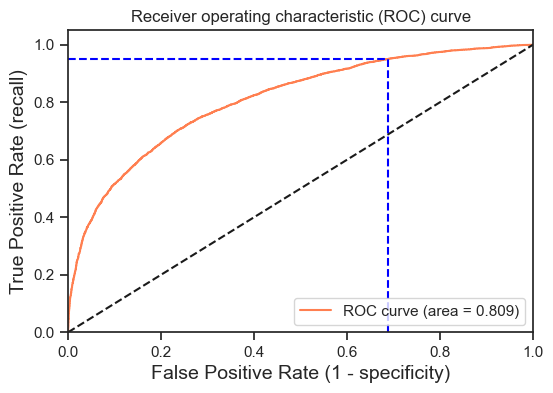

Using a threshold of 0.094 guarantees a sensitivity of 0.950 and a specificity of 0.312, i.e. a false positive rate of 68.79%.


In [ ]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1-fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

# Prediction and Submission

In [ ]:
X_given = X_given.drop(['y_pred2'],axis=1)

In [ ]:
y_pred2 = model_lgb.predict(X_given)

In [ ]:
y_pred2

array([0., 0., 0., ..., 1., 0., 0.])

In [ ]:
X_given['y_pred2']=y_pred2

In [ ]:
Y_submit = X_given['y_pred2']

In [ ]:
Y_submit.to_csv('submit_14.csv')